In [1]:
import pandas as pd
from TrajectoryClusteringAnalysis.tca import TCA

## Load data

In [2]:
df = pd.read_csv('../data/dataframe_test.csv')
df.head()

,id,month,care_status,sex,age,education,wealth,distance_clinic
0,3,0.0,D,1.0,1.0,2.0,2.0,1.0
1,3,1.0,D,1.0,1.0,2.0,2.0,1.0
2,3,2.0,D,1.0,1.0,2.0,2.0,1.0
3,3,3.0,D,1.0,1.0,2.0,2.0,1.0
4,3,4.0,D,1.0,1.0,2.0,2.0,1.0


## Preprocessing data
### convert data from long format to wide format

In [3]:
# Sélectionner les colonnes pertinentes pour l'analyse
selected_cols = df[['id', 'month', 'care_status']]
# Créer un tableau croisé des données en format large
#       -> Chaque individu est sur une ligne.
#       -> Les mesures dans le temps (Temps1, Temps2, Temps3) sont des colonnes distinctes.
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')
pivoted_data['id'] = pivoted_data.index
pivoted_data = pivoted_data[['id'] + [col for col in pivoted_data.columns if col != 'id']]
# Renommer les colonnes avec un préfixe "month_"
pivoted_data.columns = ['id'] + ['month_' + str(int(col)+1) for col in pivoted_data.columns[1:]]
# Sélectionner un échantillon aléatoire de 10% des données
pivoted_data_random_sample = pivoted_data.sample(frac=0.1, random_state=42).reset_index(drop=True)
pivoted_data_random_sample.head()

,id,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_42,month_43,month_44,month_45,month_46,month_47,month_48,month_49,month_50,month_51
0,4971,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7484,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1252,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9004,D,D,D,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6229,D,T,T,D,D,D,D,D,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## pakage initialization

In [4]:
tca = TCA(data=pivoted_data_random_sample,
              id='id',
              alphabet=['D', 'C', 'T', 'S'],
              states=["diagnostiqué", "en soins", "sous traitement", "inf. contrôlée"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (293, 52)
state coding:
   alphabet            label  label encoded
0        D     diagnostiqué              1
1        C         en soins              2
2        T  sous traitement              3
3        S   inf. contrôlée              4


## Distance Optimal Matching

### 1: method =constant

In [5]:
substitution_cost_matrix=tca.compute_substitution_cost_matrix(method='constant')
substitution_cost_matrix

,D,C,T,S
D,0.0,2.0,2.0,2.0
C,2.0,0.0,2.0,2.0
T,2.0,2.0,0.0,2.0
S,2.0,2.0,2.0,0.0


In [6]:
distance_matrix = tca.compute_distance_matrix(metric='optimal_matching', substitution_cost_matrix=substitution_cost_matrix)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: optimal_matching...


substitution cost matrix: 
      D    C    T    S
D  0.0  2.0  2.0  2.0
C  2.0  0.0  2.0  2.0
T  2.0  2.0  0.0  2.0
S  2.0  2.0  2.0  0.0
indel cost:  1.0


100%|██████████| 293/293 [00:00<00:00, 1665.58it/s]
INFO:root:Time taken for computation: 0.18 seconds


distance matrix :
 [[0.         0.14285714 0.78947368 ... 0.28571429 0.57142857 1.14285714]
 [0.14285714 0.         0.68421053 ... 0.16666667 0.5        1.16666667]
 [0.78947368 0.68421053 0.         ... 0.57894737 0.68421053 0.78947368]
 ...
 [0.28571429 0.16666667 0.57894737 ... 0.         0.4        1.2       ]
 [0.57142857 0.5        0.68421053 ... 0.4        0.         1.33333333]
 [1.14285714 1.16666667 0.78947368 ... 1.2        1.33333333 0.        ]]


INFO:root:Computing the linkage matrix using method: ward...
INFO:root:Linkage matrix computed successfully


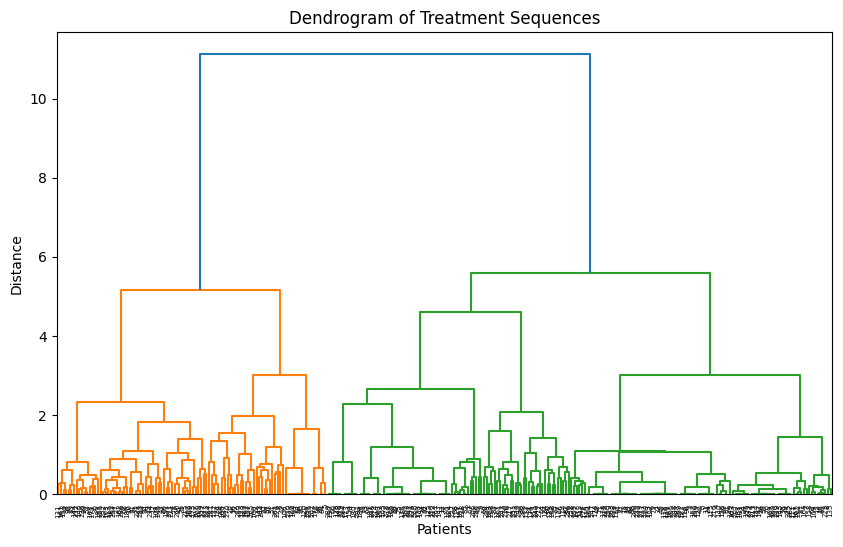

In [7]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

### plot heatmap with distance OM

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.clustermap(data.drop(id_col, axis=1).replace(label_to_encoded),


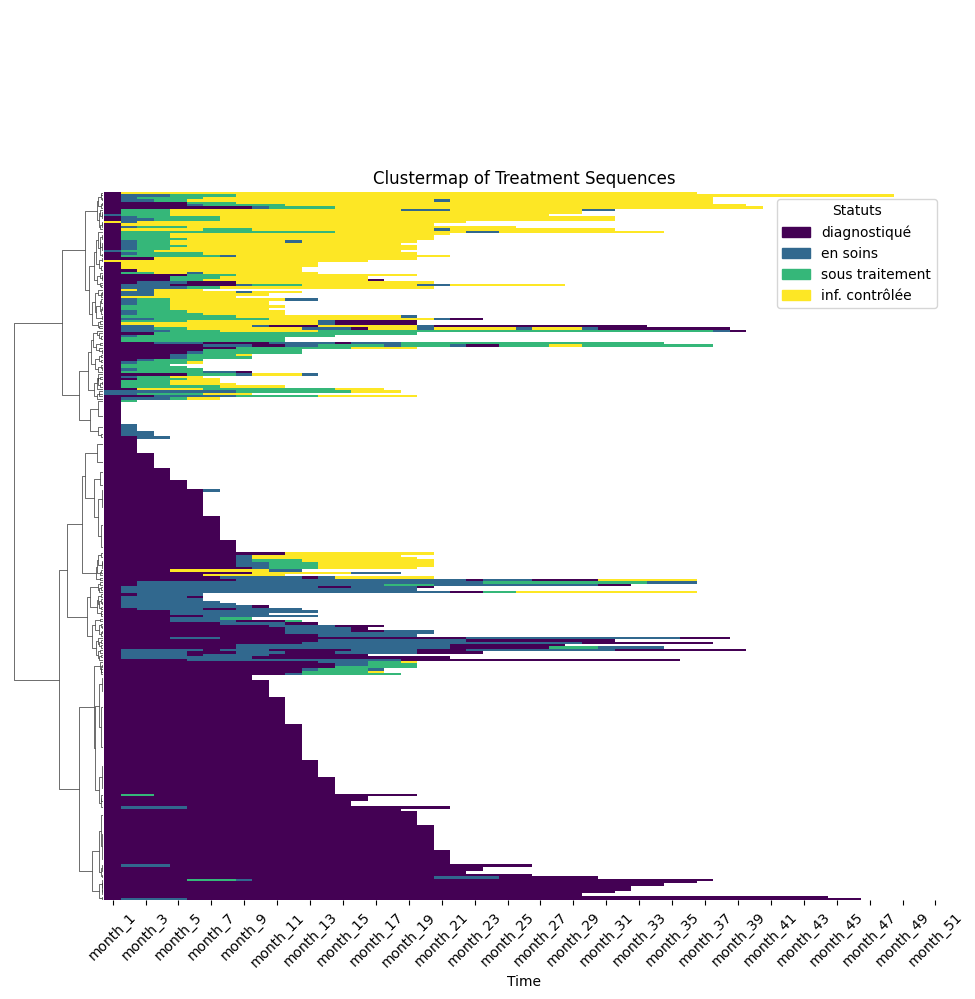

In [8]:
tca.plot_clustermap(linkage_matrix)

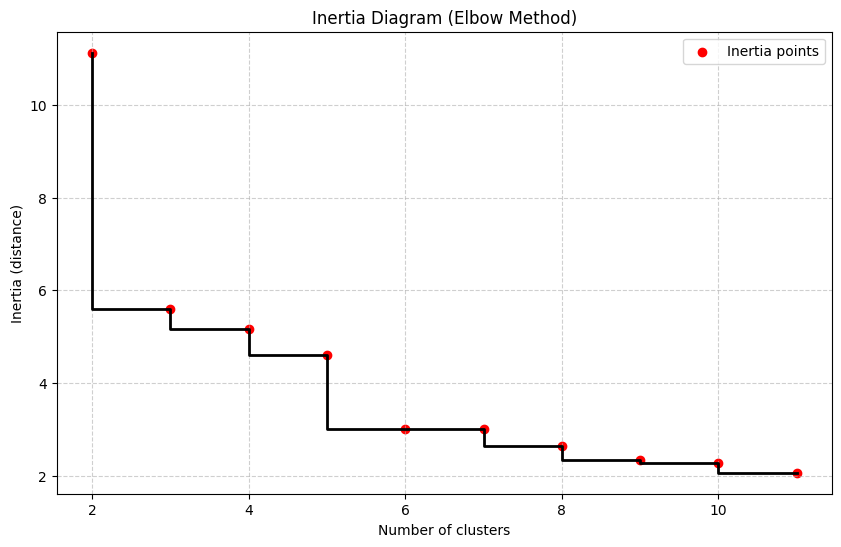

In [9]:
tca.plot_inertia(linkage_matrix)

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:120: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:120: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\

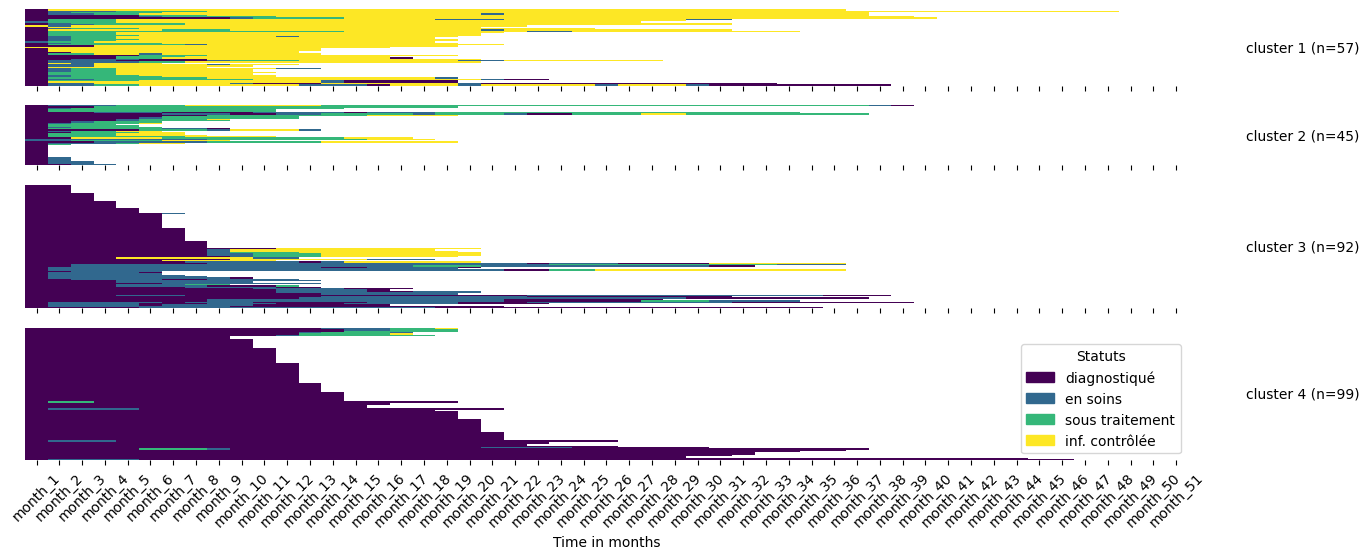

In [10]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=4)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(distance_matrix, clusters)

0.2728313335089984

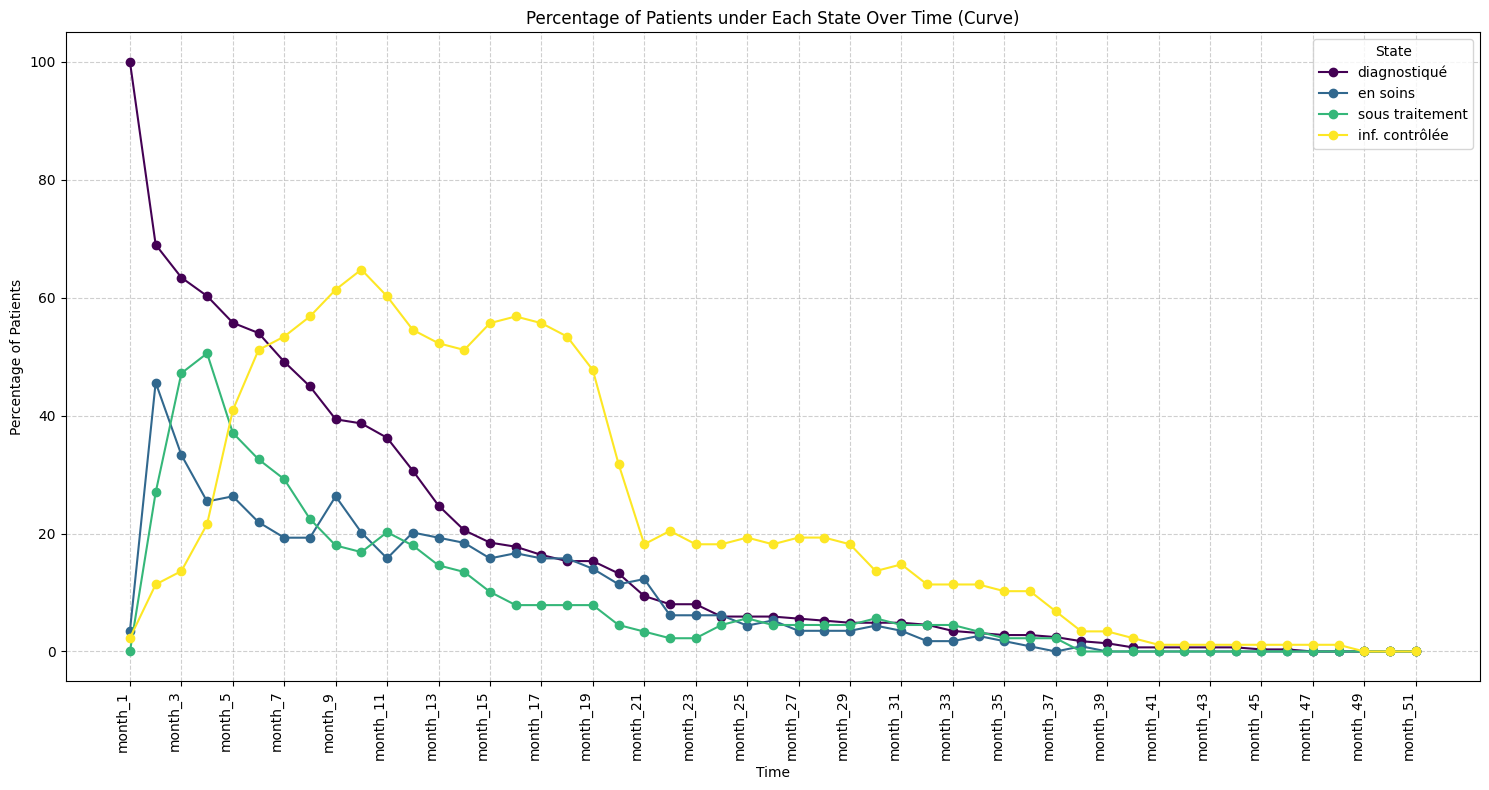

In [12]:
tca.plot_treatment_percentage()

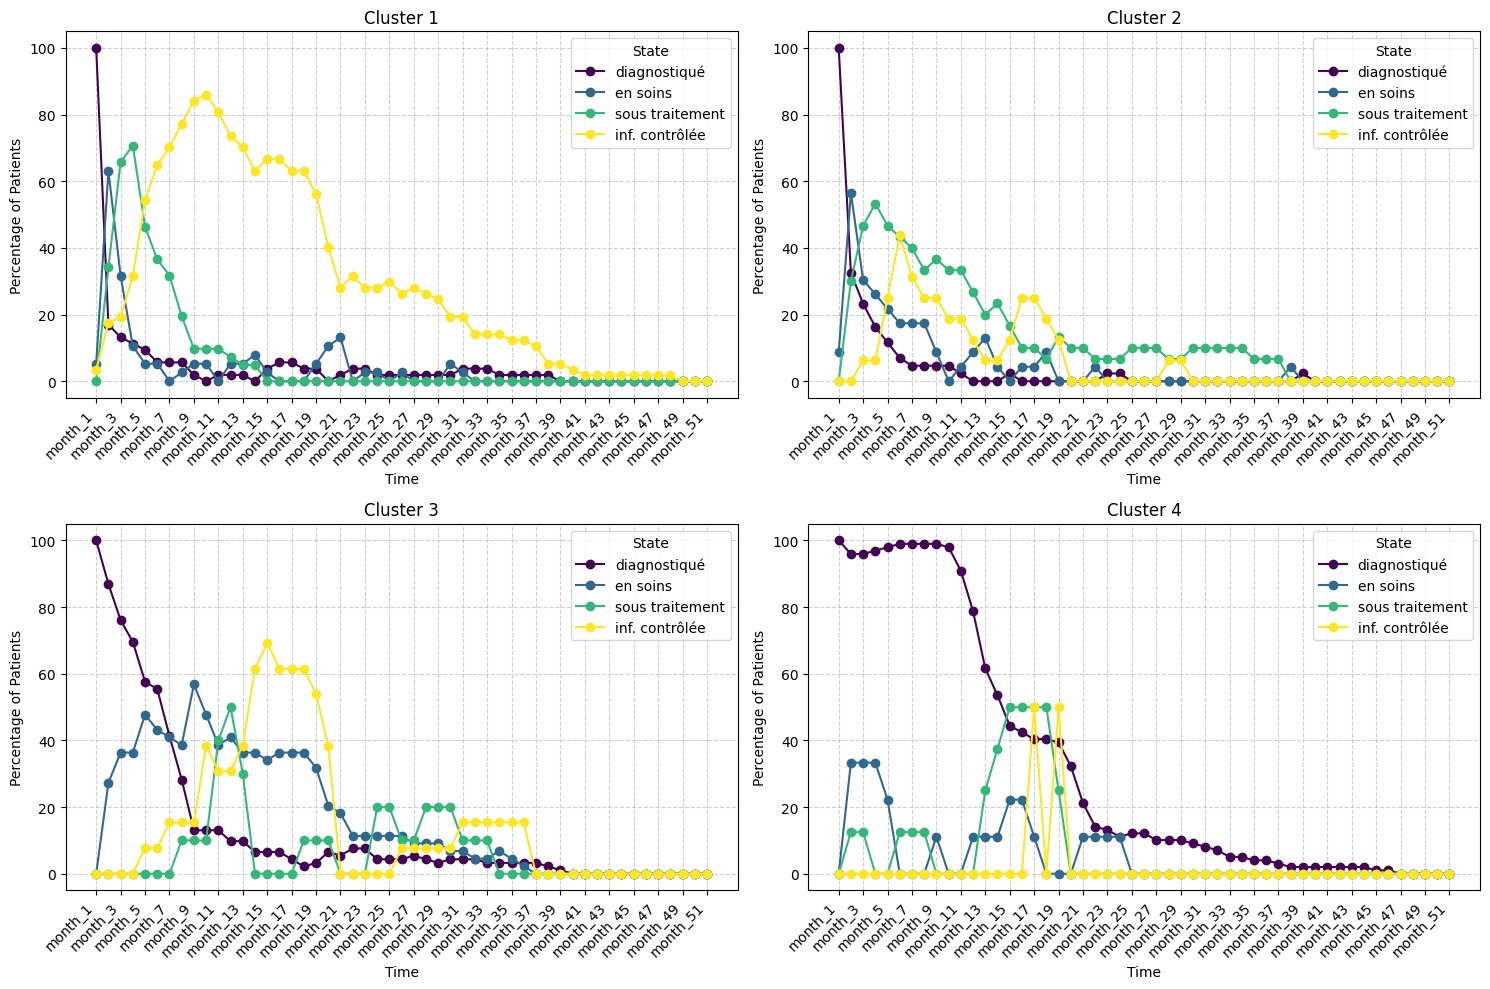

In [13]:
tca.plot_treatment_percentage(clusters=clusters)

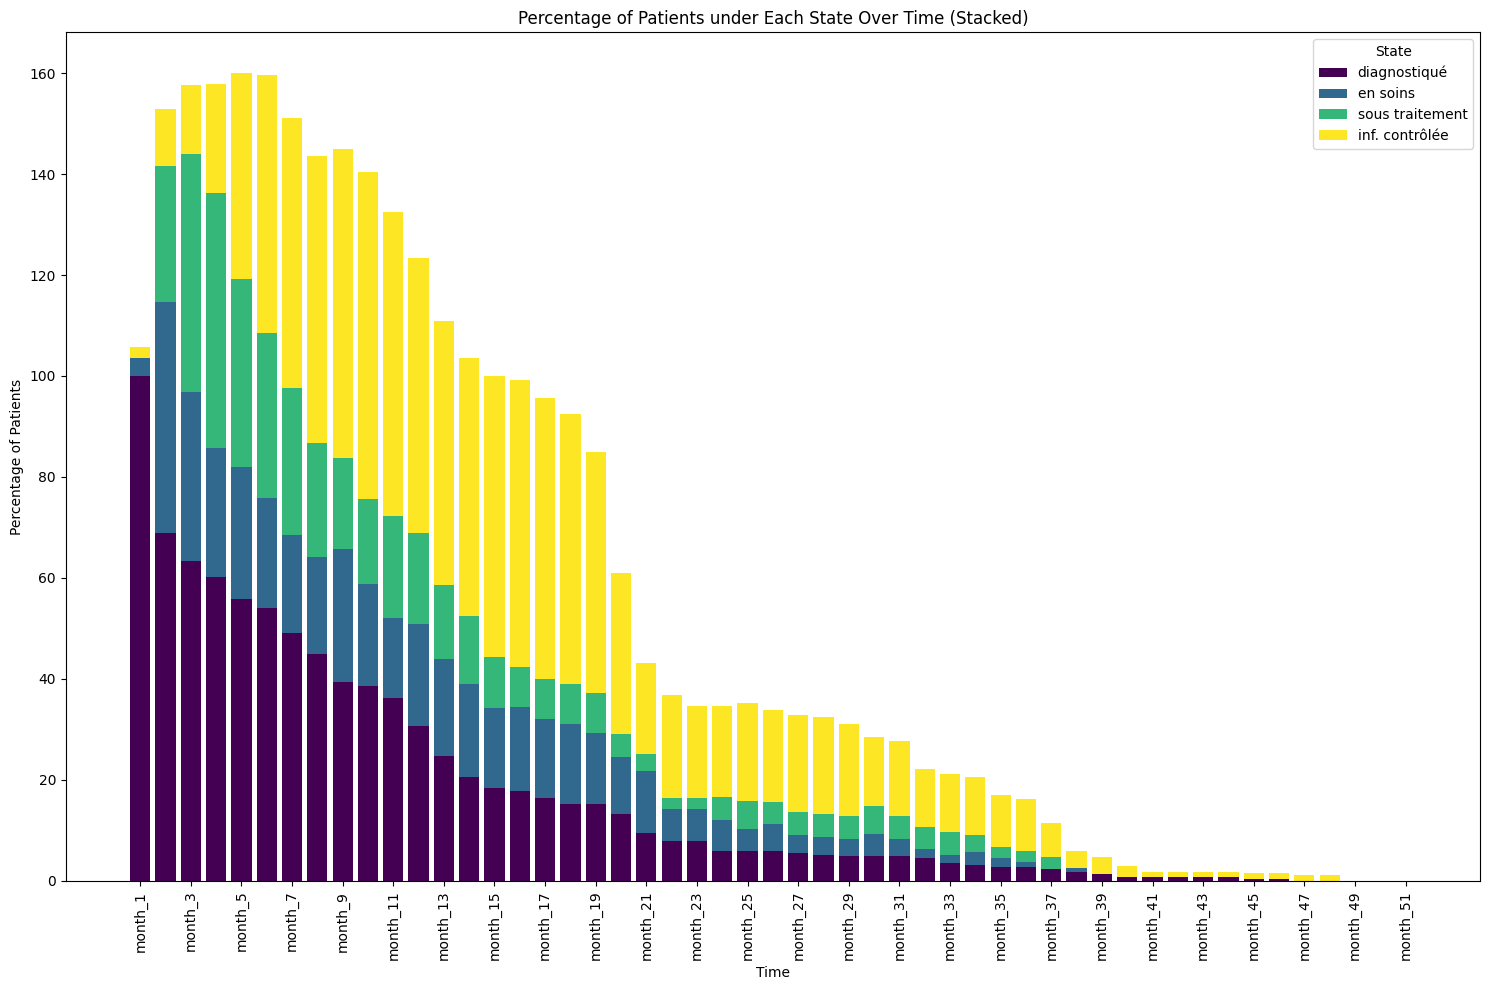

In [14]:

tca.bar_treatment_percentage()

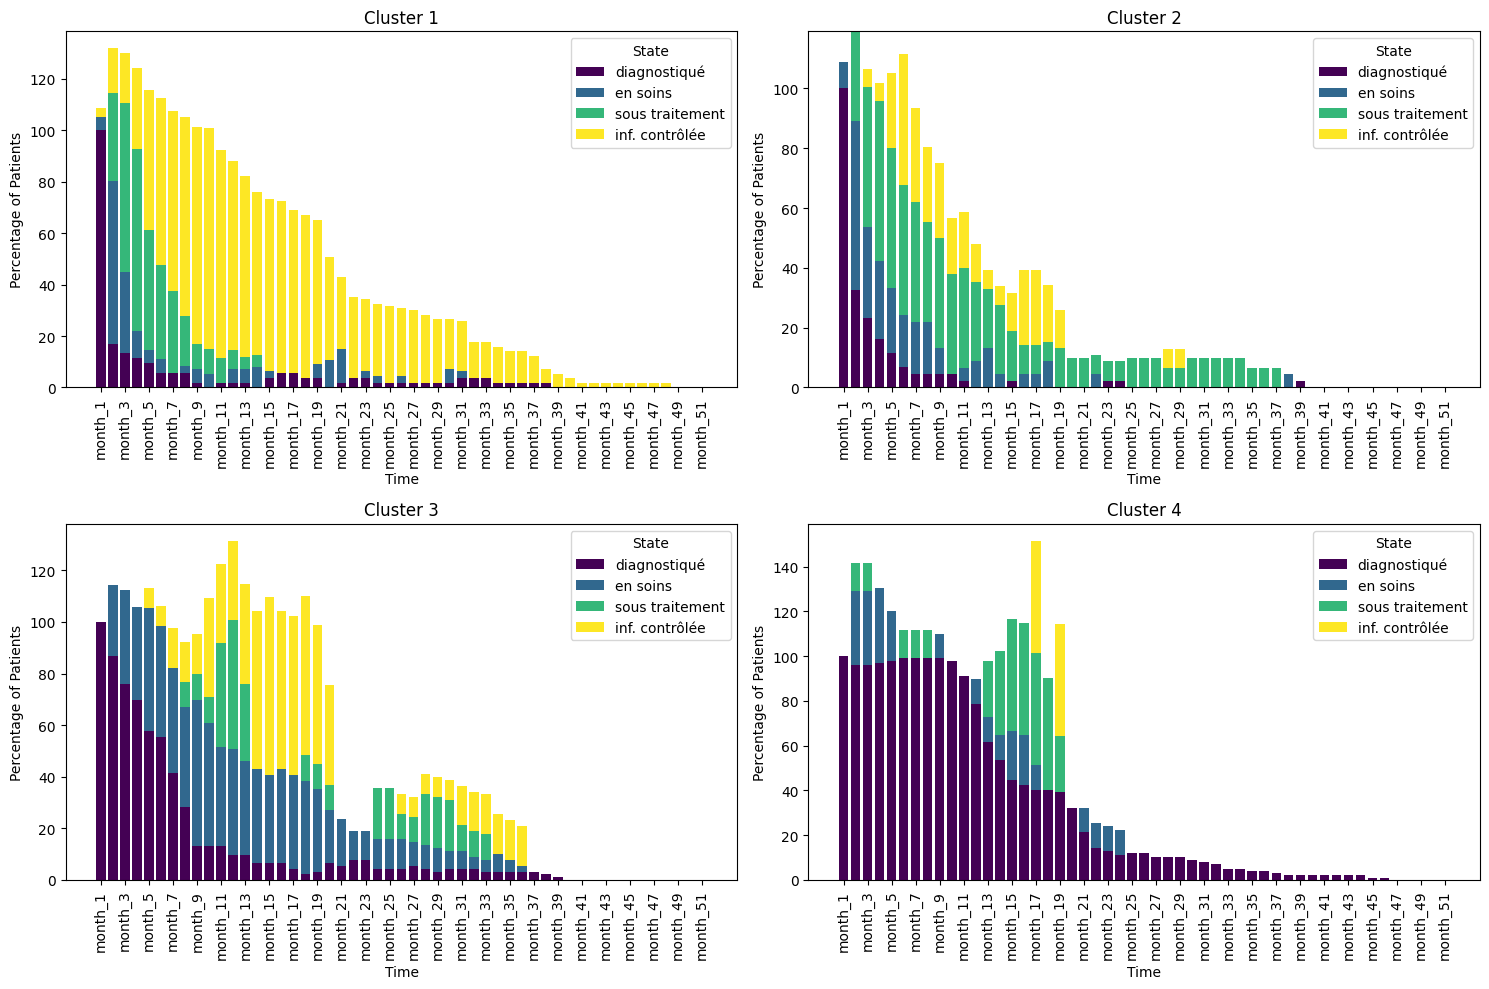

In [15]:
tca.bar_treatment_percentage(clusters=clusters)

### 2: methode custom

In [16]:
custom_costs = {'D:C':1, 'D:T':2, 'D:S':3,
                'C:T':2, 'C:S':1,
                'T:S':1}  

In [17]:
substitution_cost_matrix=tca.compute_substitution_cost_matrix(method='custom', custom_costs=custom_costs)
substitution_cost_matrix

,D,C,T,S
D,0.0,1.0,2.0,3.0
C,1.0,0.0,2.0,1.0
T,2.0,2.0,0.0,1.0
S,3.0,1.0,1.0,0.0


In [18]:
tca.alphabet

['D', 'C', 'T', 'S']

In [19]:
distance_matrix = tca.compute_distance_matrix(metric='optimal_matching', substitution_cost_matrix=substitution_cost_matrix)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: optimal_matching...


substitution cost matrix: 
      D    C    T    S
D  0.0  1.0  2.0  3.0
C  1.0  0.0  2.0  1.0
T  2.0  2.0  0.0  1.0
S  3.0  1.0  1.0  0.0
indel cost:  1.5


100%|██████████| 293/293 [00:00<00:00, 1396.77it/s]
INFO:root:Time taken for computation: 0.22 seconds


distance matrix :
 [[0.         0.21428571 0.92105263 ... 0.42857143 0.85714286 1.5       ]
 [0.21428571 0.         0.81578947 ... 0.25       0.75       1.5       ]
 [0.92105263 0.81578947 0.         ... 0.76315789 1.02631579 1.18421053]
 ...
 [0.42857143 0.25       0.76315789 ... 0.         0.6        1.5       ]
 [0.85714286 0.75       1.02631579 ... 0.6        0.         1.5       ]
 [1.5        1.5        1.18421053 ... 1.5        1.5        0.        ]]


INFO:root:Computing the linkage matrix using method: ward...
INFO:root:Linkage matrix computed successfully


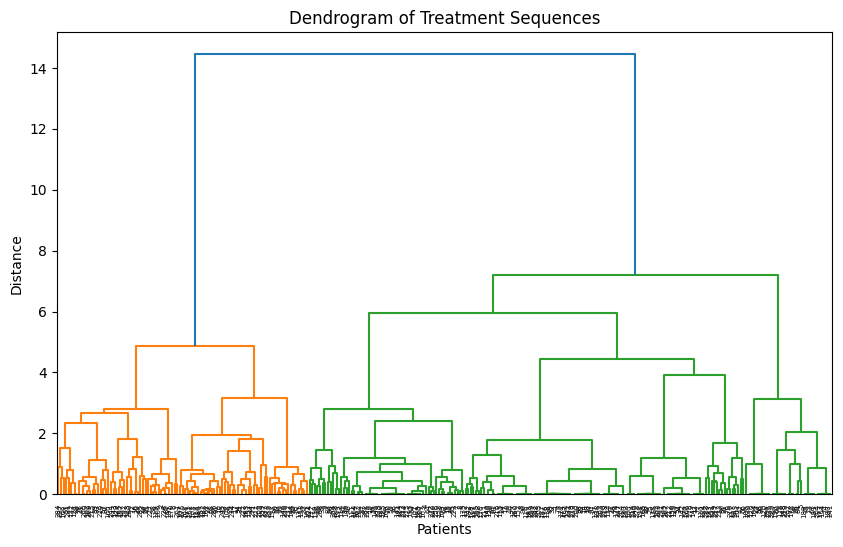

In [19]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.clustermap(data.drop(id_col, axis=1).replace(label_to_encoded),


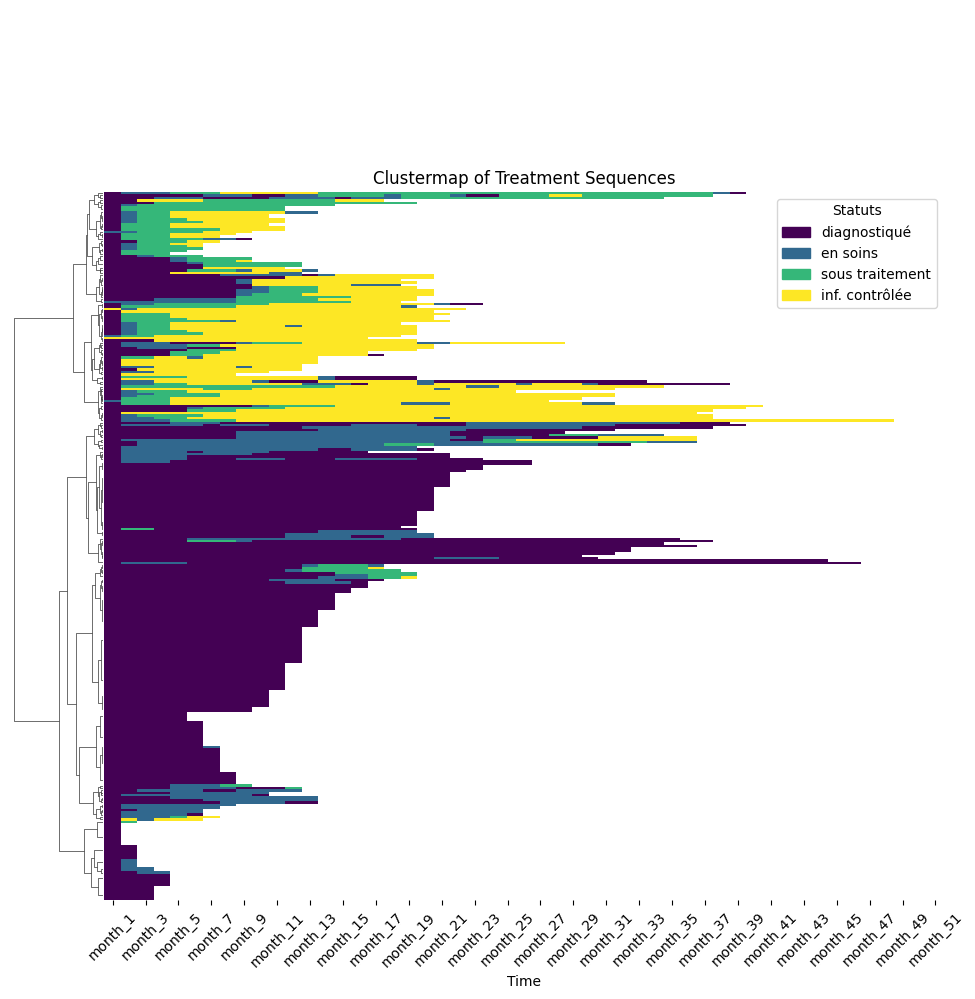

In [20]:
tca.plot_clustermap(linkage_matrix)

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:120: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:120: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\

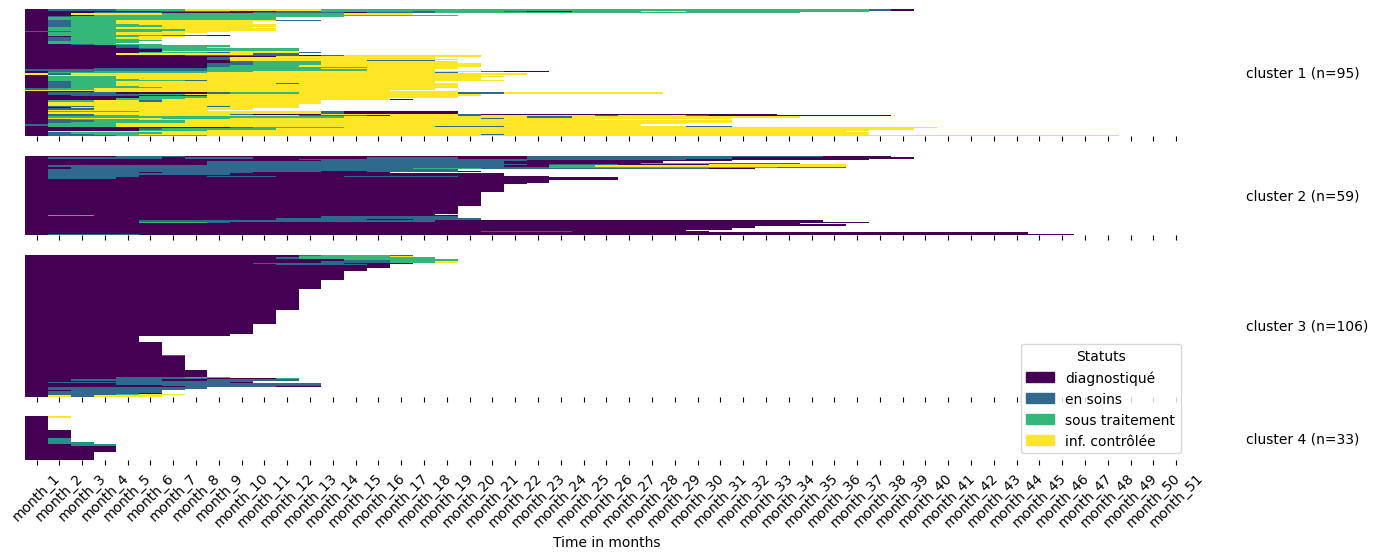

In [21]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=4)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

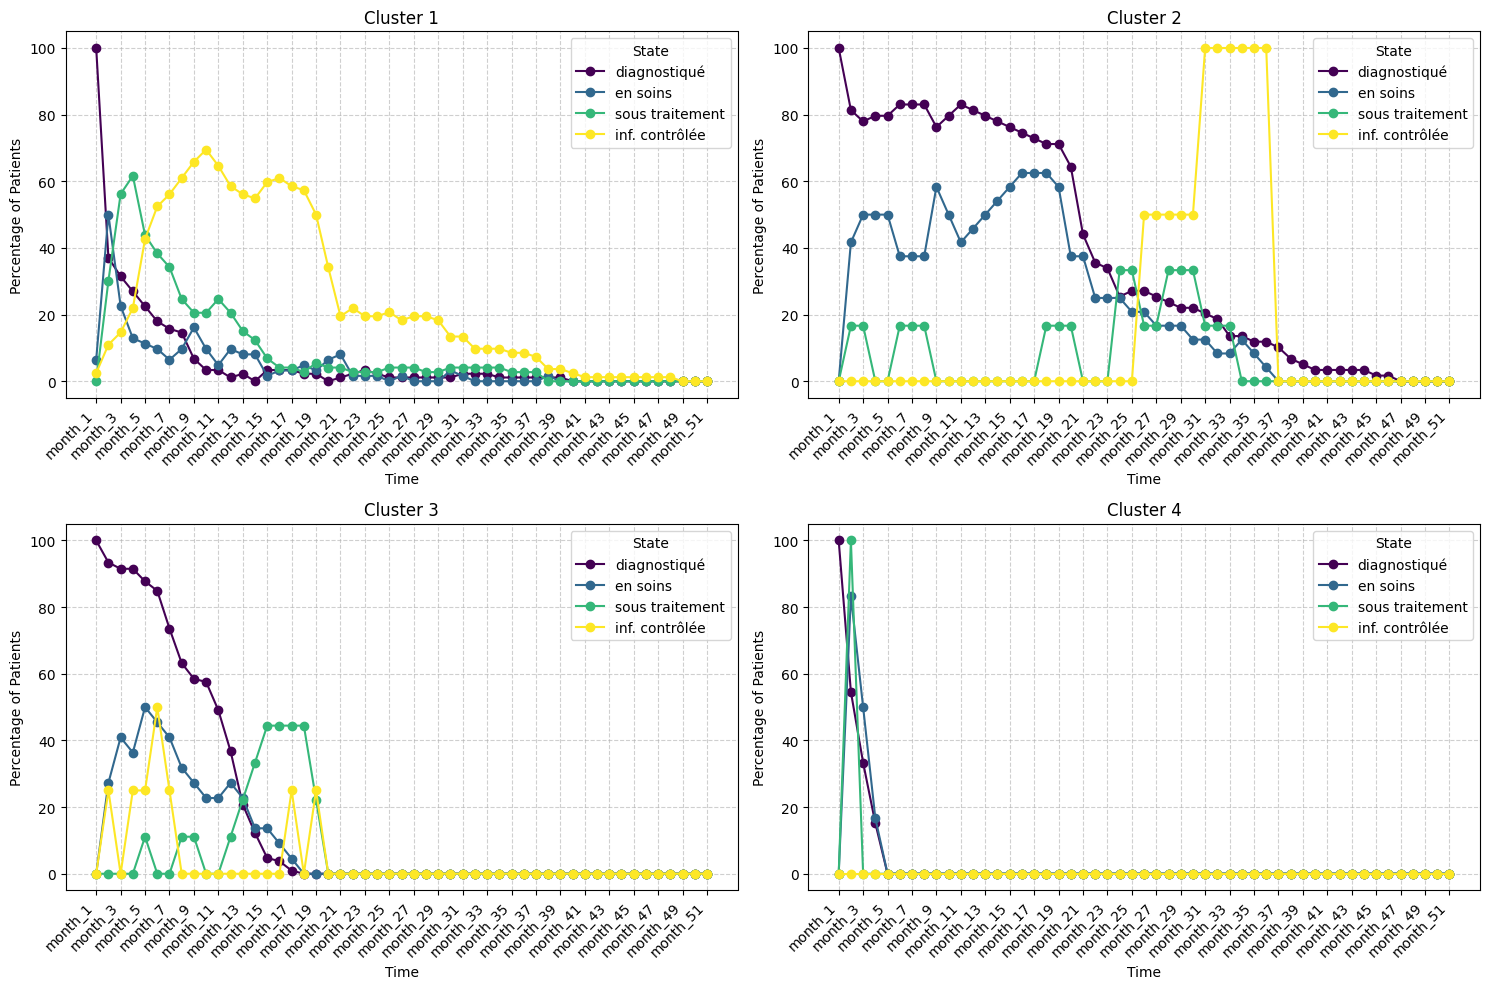

In [22]:
tca.plot_treatment_percentage(clusters=clusters)